# Final Project:

# Analysis of Rent Prices over Time

### Introduction

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error

Websites I got this data from:

https://www.kaggle.com/datasets/zillow/rent-index?select=pricepersqft.csv

https://fredaccount.stlouisfed.org/datalists/322130

## Data Collection

### Importing rent prices data

For this project, the data comes from two csv files that were posted to Kaggle and another csv file with data from the US Census. 

The two files we import below contain data on price per square foot and total rent price of rental properties in various cities throughout the US. We can read the file by using pandas read_csv function which will read our file and import it straight into a dataframe. Later we will combine all three.

In [82]:
price = pd.read_csv('price.csv')
price

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,397405,Highland Township,Gettysburg,Adams,PA,13127,1280.0,1280.0,1284.0,1284.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,398292,Town of Wrightstown,Green Bay,Brown,WI,13128,639.0,650.0,668.0,694.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,398343,Urbana,Corning,Steuben,NY,13129,1433.0,1431.0,1437.0,1458.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,398839,Angels,NaN,Calaveras,CA,13130,1516.0,1529.0,1529.0,1515.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563


In [83]:
price_per_sq_ft = pd.read_csv('pricepersqft.csv')
price_per_sq_ft

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11914,182023,Henrico,Richmond,Henrico,VA,11915,0.740,0.736,0.734,0.734,...,0.854,0.856,0.856,0.856,0.856,0.858,0.858,0.860,0.862,0.860
11915,397405,Highland Township,Gettysburg,Adams,PA,11916,0.780,0.776,0.778,0.778,...,0.832,0.836,0.826,0.822,0.812,0.810,0.808,0.804,0.788,0.774
11916,398343,Urbana,Corning,Steuben,NY,11917,0.954,0.956,0.970,0.984,...,1.030,1.032,1.038,1.042,1.046,1.048,1.048,1.048,1.042,1.034
11917,398839,Angels,NaN,Calaveras,CA,11918,0.976,0.984,0.988,0.980,...,0.974,0.980,0.984,0.980,0.980,0.982,0.992,1.004,1.014,1.018


Printing out our tables is veery important so that we can visualize aspects of our data. Throughout this tutorial, any time we change our tables we will display it to make sure that everything is in order.

In the above table we can already see some important information. 

We can see that our range of dates is 2011-2016, as well as that there are some NaN values. We will be adressing this information soon.

### Importing median income data

We will also be importing data from a seperate csv file that contains the median house hold income each year. When I downloaded the file, I specifically chose to only download data from 2011-2016 because that is the range of dates in our other table. 

Note: We are not including the one month in 2017 because it is only one month out of the year. This will get dropped later when we merge the tables.

In [84]:
med_inc = pd.read_csv('MEHOINUSA672N.csv')
med_inc

,DATE,MEHOINUSA672N
0,2011-01-01,63350
1,2012-01-01,63350
2,2013-01-01,65740
3,2014-01-01,64900
4,2015-01-01,68410
5,2016-01-01,70840


## Data Processing

At this point in the Data Science Pipeline we have our data imported into dataframes, ready to be accessed. Now we have to process our data which requires manipulating our tables to display information in an effective way. We can use Pandas and Numpy to do this. These are two very powerfull libraries that provide functionality to our data that you will see throughout this tutorial. 

We have already imported our data into a pandas dataframe which will allow us to mold it to fit our needs.

### Cleaning The Data

Right now, our data has distinct columns for each month throughout our date range. This format can be dificult to work with so we are going to create a new column called "Date" which will have a distinct month and year for each observation (Row).

This will increase the number of rows we have in our dataframe by a factor of 60 (12 months over 5 years) but we will also loose those 60 seperate date columns in exchange for just one per observation.

This will be very usefull later on for grouping and aggregating data based on dates.

In [85]:
ppsf = pd.melt(price_per_sq_ft, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'], var_name='Date', value_name='Price Per Sq. Ft.')
price = pd.melt(price, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'], var_name='Date', value_name='Rent Price')
print(ppsf)
print(price)

        City Code               City         Metro        County State  \
0            6181           New York      New York        Queens    NY   
1           12447        Los Angeles   Los Angeles   Los Angeles    CA   
2           17426            Chicago       Chicago          Cook    IL   
3           39051            Houston       Houston        Harris    TX   
4           13271       Philadelphia  Philadelphia  Philadelphia    PA   
...           ...                ...           ...           ...   ...   
893920     182023            Henrico      Richmond       Henrico    VA   
893921     397405  Highland Township    Gettysburg         Adams    PA   
893922     398343             Urbana       Corning       Steuben    NY   
893923     398839             Angels           NaN     Calaveras    CA   
893924     737788    Lebanon Borough      New York     Hunterdon    NJ   

        Population Rank           Date  Price Per Sq. Ft.  
0                     1  November 2010             

Here, we are going to merge the Price Per Square Inch table and the Total Price dataframes. We want to merge on every column except the two that are different (Price per sq in and price). This way, we will ensure that we match the correct price with its price per sq in and vise versa.


We will also add a year column to be used when we merge the dataframes. When we merge them, we will do it on the year column because we only have the average income for each year and in our rent data we have multiple observations per year. This will ensure that if two observations have the same year, they also have the same median income.

In [86]:
data = pd.merge(price, ppsf, on=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank', 'Date'])
data['Date'] = pd.to_datetime(data['Date'], format='%B %Y')
data['year'] = data['Date'].dt.year
data

,City Code,City,Metro,County,State,Population Rank,Date,Rent Price,Price Per Sq. Ft.,year
0,6181,New York,New York,Queens,NY,1,2010-11-01,NaN,NaN,2010
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2010-11-01,2184.0,1.578,2010
2,17426,Chicago,Chicago,Cook,IL,3,2010-11-01,1563.0,1.244,2010
3,39051,Houston,Houston,Harris,TX,4,2010-11-01,1198.0,0.788,2010
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,2010-11-01,1092.0,0.854,2010
...,...,...,...,...,...,...,...,...,...,...
20770,17845,Eagan,Minneapolis-St Paul,Dakota,MN,644,2017-01-01,1728.0,1.538,2017
20771,17718,Daytona Beach,Daytona Beach,Volusia,FL,645,2017-01-01,1125.0,0.878,2017
20772,26483,Pico Rivera,Los Angeles,Los Angeles,CA,646,2017-01-01,2220.0,1.784,2017
20773,54043,Racine,Racine,Racine,WI,647,2017-01-01,1013.0,0.898,2017


By default, the merge function uses an inner join which only returns rows that are the same in both dataframes. This is good for us because we want our observations to include price and price per sq ft.

Now that we have cleaned up our rent data, we are going to look at the Medium Income data.

The "DATE" columns is represented by a string but we want to change it to datetime datatype as this will allow for more functionality. One reason is for merging this table with our other data and to do that we need identical datatypes.

We also have to create a year column for when we merge the two dataframes.

In [87]:
med_inc['Date'] = pd.to_datetime(med_inc['DATE'])
med_inc.drop('DATE', axis=1, inplace=True)
med_inc['year'] = med_inc['Date'].dt.year
med_inc.drop('Date', axis=1, inplace=True)
med_inc

,MEHOINUSA672N,year
0,63350,2011
1,63350,2012
2,65740,2013
3,64900,2014
4,68410,2015
5,70840,2016


Adding this data to the main dataframe

Below, we merge the two dataframes with Pandas merge function. We acan take advantage of the year columns we made in the two dataframes. However, once we are done with the year column we can drop it as we wont use it again.

In [88]:
data = pd.merge(data, med_inc, on='year')
data = data.rename(columns={'MEHOINUSA672N' : 'Average Income'})
data.drop('year', axis=1, inplace=True)
data

,City Code,City,Metro,County,State,Population Rank,Date,Rent Price,Price Per Sq. Ft.,Average Income
0,6181,New York,New York,Queens,NY,1,2011-01-01,NaN,NaN,63350
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2011-01-01,2183.0,1.580,63350
2,17426,Chicago,Chicago,Cook,IL,3,2011-01-01,1547.0,1.254,63350
3,39051,Houston,Houston,Harris,TX,4,2011-01-01,1199.0,0.784,63350
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,2011-01-01,1094.0,0.858,63350
...,...,...,...,...,...,...,...,...,...,...
19939,17845,Eagan,Minneapolis-St Paul,Dakota,MN,644,2016-12-01,1723.0,1.532,70840
19940,17718,Daytona Beach,Daytona Beach,Volusia,FL,645,2016-12-01,1123.0,0.876,70840
19941,26483,Pico Rivera,Los Angeles,Los Angeles,CA,646,2016-12-01,2203.0,1.770,70840
19942,54043,Racine,Racine,Racine,WI,647,2016-12-01,1021.0,0.896,70840


We can see above that we lost a few rows. This is because when we merged that median income (ranging from 2011-2016) it dropped the rows from 2017.

NaN Values

Now we will adress the rows with NaN values.

There are a couple ways we can deal with rows that have missing data. We can either delete those rows, or insert values that reflect similar observations or averages. 

First, we should look at the rows with NaN values to decide what we should do.

In [89]:
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nan

,City Code,City,Metro,County,State,Population Rank,Date,Rent Price,Price Per Sq. Ft.,Average Income
0,6181,New York,New York,Queens,NY,1,2011-01-01,NaN,NaN,63350
27,5976,Milwaukee,Milwaukee,Milwaukee,WI,28,2011-01-01,NaN,NaN,63350
32,23429,Albuquerque,Albuquerque,Bernalillo,NM,33,2011-01-01,NaN,NaN,63350
47,44055,Baton Rouge,Baton Rouge,East Baton Rouge,LA,48,2011-01-01,NaN,NaN,63350
48,19594,New Orleans,New Orleans,Orleans,LA,49,2011-01-01,NaN,NaN,63350
...,...,...,...,...,...,...,...,...,...,...
19263,11896,High Point,NaN,Guilford,NC,522,2016-10-01,875.0,0.684,70840
19477,11722,Greensboro,NaN,Guilford,NC,88,2016-11-01,979.0,0.724,70840
19540,11896,High Point,NaN,Guilford,NC,522,2016-11-01,874.0,0.684,70840
19754,11722,Greensboro,NaN,Guilford,NC,88,2016-12-01,984.0,0.724,70840


We can see above that there are multiple cases on missing values. One that we can see is missing price and price per sq in values. These are vital to our observations so we can drop these columns 

In [90]:
data = data.dropna(subset=['Rent Price', 'Price Per Sq. Ft.'], axis=0)
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nan

,City Code,City,Metro,County,State,Population Rank,Date,Rent Price,Price Per Sq. Ft.,Average Income
87,11722,Greensboro,NaN,Guilford,NC,88,2011-01-01,917.0,0.660,63350
150,11896,High Point,NaN,Guilford,NC,522,2011-01-01,838.0,0.642,63350
364,11722,Greensboro,NaN,Guilford,NC,88,2011-02-01,927.0,0.670,63350
427,11896,High Point,NaN,Guilford,NC,522,2011-02-01,851.0,0.648,63350
641,11722,Greensboro,NaN,Guilford,NC,88,2011-03-01,945.0,0.680,63350
...,...,...,...,...,...,...,...,...,...,...
19263,11896,High Point,NaN,Guilford,NC,522,2016-10-01,875.0,0.684,70840
19477,11722,Greensboro,NaN,Guilford,NC,88,2016-11-01,979.0,0.724,70840
19540,11896,High Point,NaN,Guilford,NC,522,2016-11-01,874.0,0.684,70840
19754,11722,Greensboro,NaN,Guilford,NC,88,2016-12-01,984.0,0.724,70840


So now, we can see there are also rows with NaN for the "Metro" column. Lets find out why these values are NaN.

There are a few possibilities: 

Based on the data printed above, it looks like it might be one specific county that is missing values for Metro.
Another observation is that it could be related to the state.

To verify this, we can check the unique values of these columns in the rows that have NaN values. If there is only one unique county or state then we know that it is not at random.

In [91]:
print(rows_with_nan['County'].unique())
print(rows_with_nan['State'].unique())

['Guilford']
['NC']


Well, we can see that the NaN values are related to a specific county. It seems that The only NaN values left are in the Metro column of only observations from Guilford county North Carolina.

Let's now check to see if after we drop the rows with NaN values, there are any observations left from Guilford county

In [92]:
data = data.dropna(subset='Metro', axis=0)
len(data[data['County'] == 'Guilford'])

0

Since all observations from Guilford county are NaN, it is ok for us to drop the observations because we don't really need those observations from that one specific county.

In [93]:
len(data[data.isna().any(axis=1)])

0

We can see above that there are no more rows with any NaN values, now we can move on to visualizing the data. This is a look at the final data after being curated.

Lastly we are going to add data that we can calculate based on the other columns. In particular, we can add a Square foot column based on the price per sq ft and the price columns. This will be usefull in modeling the data.

In [94]:
data['Square Footage'] = data['Rent Price'] / data['Price Per Sq. Ft.']

In [95]:
data

,City Code,City,Metro,County,State,Population Rank,Date,Rent Price,Price Per Sq. Ft.,Average Income,Square Footage
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2011-01-01,2183.0,1.580,63350,1381.645570
2,17426,Chicago,Chicago,Cook,IL,3,2011-01-01,1547.0,1.254,63350,1233.652313
3,39051,Houston,Houston,Harris,TX,4,2011-01-01,1199.0,0.784,63350,1529.336735
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,2011-01-01,1094.0,0.858,63350,1275.058275
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,2011-01-01,1071.0,0.766,63350,1398.172324
...,...,...,...,...,...,...,...,...,...,...,...
19939,17845,Eagan,Minneapolis-St Paul,Dakota,MN,644,2016-12-01,1723.0,1.532,70840,1124.673629
19940,17718,Daytona Beach,Daytona Beach,Volusia,FL,645,2016-12-01,1123.0,0.876,70840,1281.963470
19941,26483,Pico Rivera,Los Angeles,Los Angeles,CA,646,2016-12-01,2203.0,1.770,70840,1244.632768
19942,54043,Racine,Racine,Racine,WI,647,2016-12-01,1021.0,0.896,70840,1139.508929


## Data Visualization

To observe trends in the data it must be plotted and visualized using various methods. This can be done by calling functions and performing operations on the data that was curated from above.

First, a plot of rent price over time will be displayed,

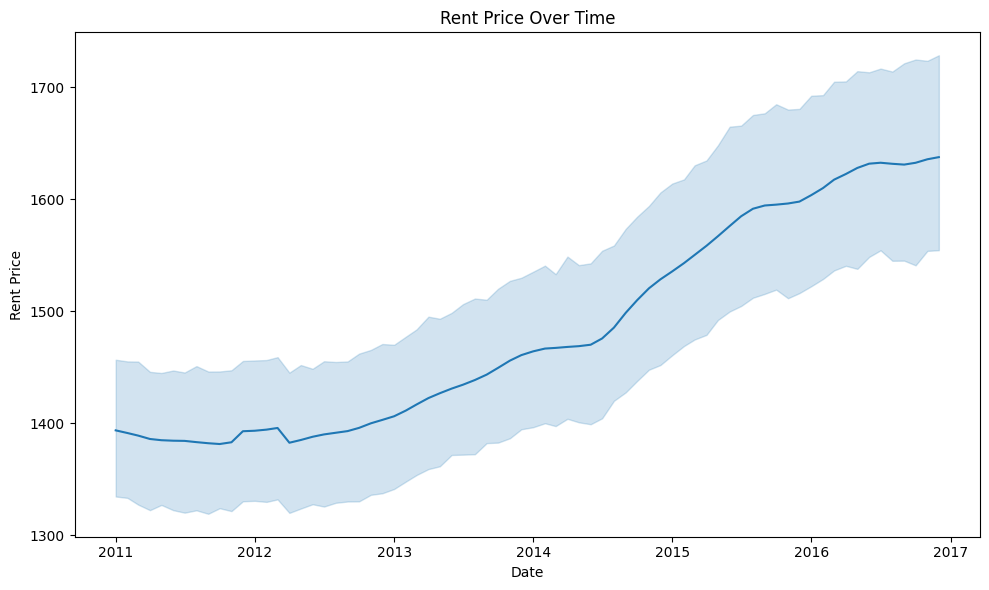

In [96]:
# Standard plot of rent price over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Rent Price')
plt.title('Rent Price Over Time')
plt.xlabel('Date')
plt.ylabel('Rent Price')
plt.tight_layout()
plt.show()


This plot shoes that the rent price has increased over the years from 2011 to 2017. This plot also shows the boundary between where the maximum and minimum values are, showing that the two extrema follow the same increase as the average rent price.

The next plot that will be displayed is a violin plot of the Rent Price Distribution over Time. The violin plot is particularly powerful for representing a distrubtion as it shows the distributional characteristics. Also various summary statistics are represented by this plot such as  the median, quartiles, or mean.

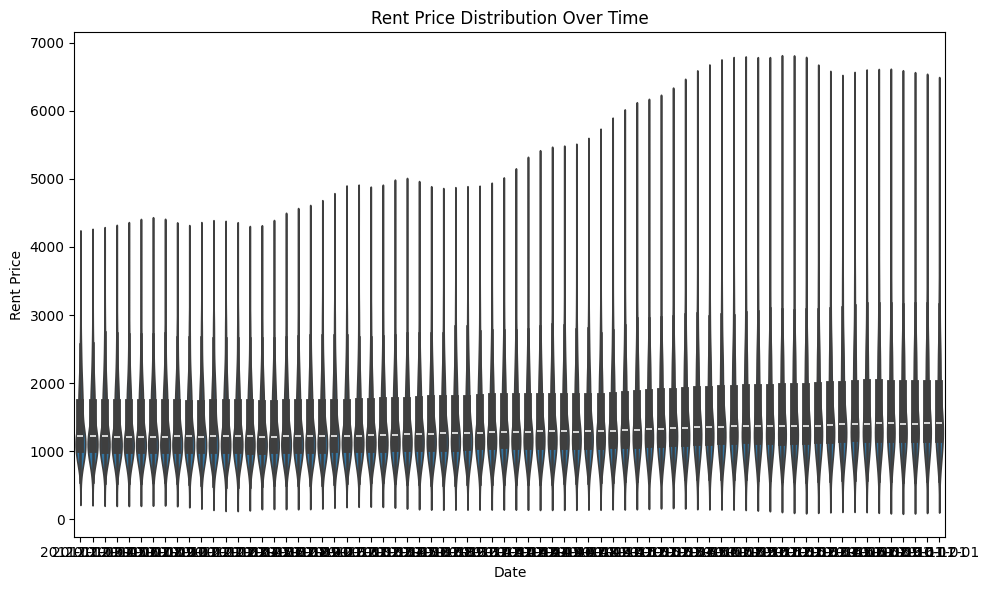

In [97]:
# Violin plot of rent price distribution over time
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Date', y='Rent Price')
plt.title('Rent Price Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Rent Price')
plt.tight_layout()
plt.show()

This plot shows that the median has not increased as drastically as the mean or average rent price as increased. This is suprising, as due to inflation one could believe that this would have increased a lot more over the past couple years. This plot also shos that the maximum rent price has increased pretty drastically in the last few years represented in the plot. This helps explain the disparity between the mean and the average, as it appears that people are more willing to pay higher rents now, while most people still stay with what they were previously comfortable with.

This brings the purpose of the next plot, which is the plot of rent prices versus average income. This will show how much income the people have who are paying these particular prices of rent for homes and apartments.

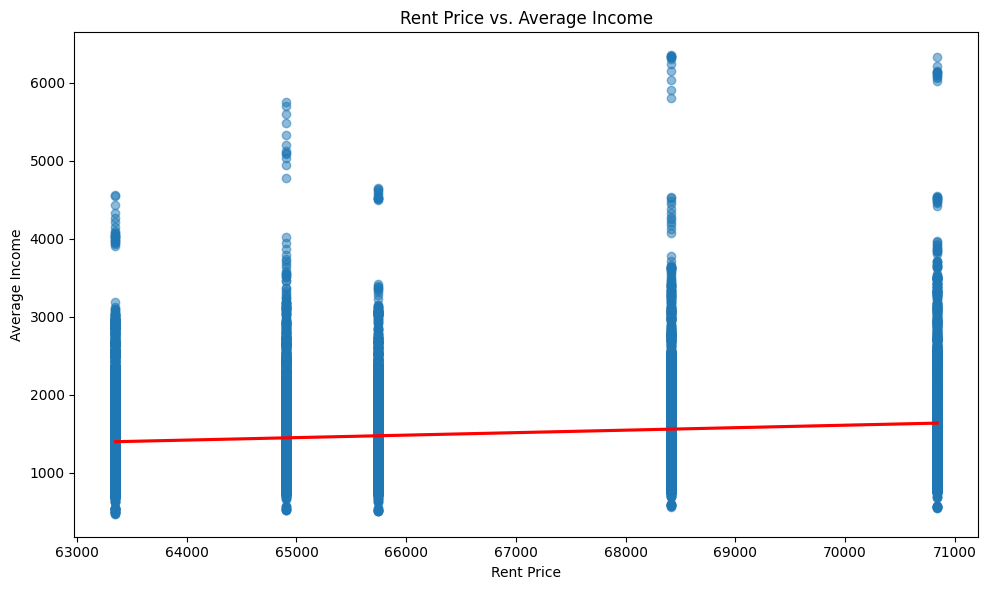

In [98]:
# Plot of rent price and average income over time
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=data, x='Date', y='Rent Price', label='Rent Price')
# sns.lineplot(data=data, x='Date', y='Average Income', label='Average Income')
# plt.title('Rent Price and Average Income Over Time')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Average Income', y='Rent Price', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Rent Price vs. Average Income')
plt.xlabel('Rent Price')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()

This plot shows that as the rent price increases the average income of the buyer also increases. This makes a lot of sense as these people are more willing to spend more money on rent as they have a lot more financial liberty than others who may not be comfortable with going into debt or being overwhelmed by bills. The horizontal scatter plots show that buyers were more closely together in rent price in the earlier years, but grew to have more difference between the maximum and the minum rent prices. This also does show that the rent prices are more closely grouped together around the median and not evenly distributed.

This brings us to why will some people be driven to spend more on an apartment or house than others and that could be seen by looking at a plot of rent price versus square foot of the place being purchased. This will be represented by a loglog plot as this type of plot has the power to show growth relationships very well. This is good for square feet due to hwo it increases exponentially due to the nature of house and apartments increasing in size.

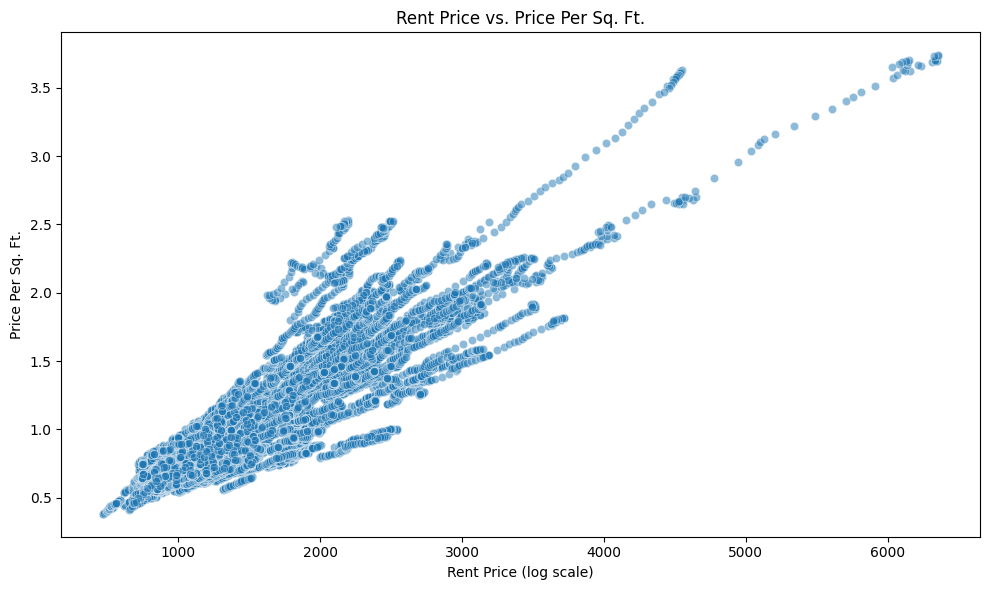

In [99]:
# Log-log plot of rent price vs. price per square foot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Rent Price', y='Price Per Sq. Ft.', alpha=0.5)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Rent Price vs. Price Per Sq. Ft.')
plt.xlabel('Rent Price (log scale)')
plt.ylabel('Price Per Sq. Ft.')
plt.tight_layout()
plt.show()


This plot shows a pivotal result which is that the larger square foot places are actually less valuable in price per square foot, which was surprising. It would be easily to predict that the opposite would've been true, but alas this was not the case. The graph also shows a constant increase in the price per square foot compared to the average square foot, but due to this being on a loglog plot this means that it is actually and exponential increase in price by powers of 10.

This brings us to the final justifier for why the rent prices look the way the due which is location. Location is highly important variable to consider as highly populated areas can cause us to have an initial hypothesis that rent prices will cost more in those such areas. This will be presented on a bar garph to show the average rent price by location.

/tmp/ipykernel_30987/1140539831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rent_by_location, x='Rent Price', y='State', palette='viridis', linewidth=2)  # Adjust linewidth for gaps


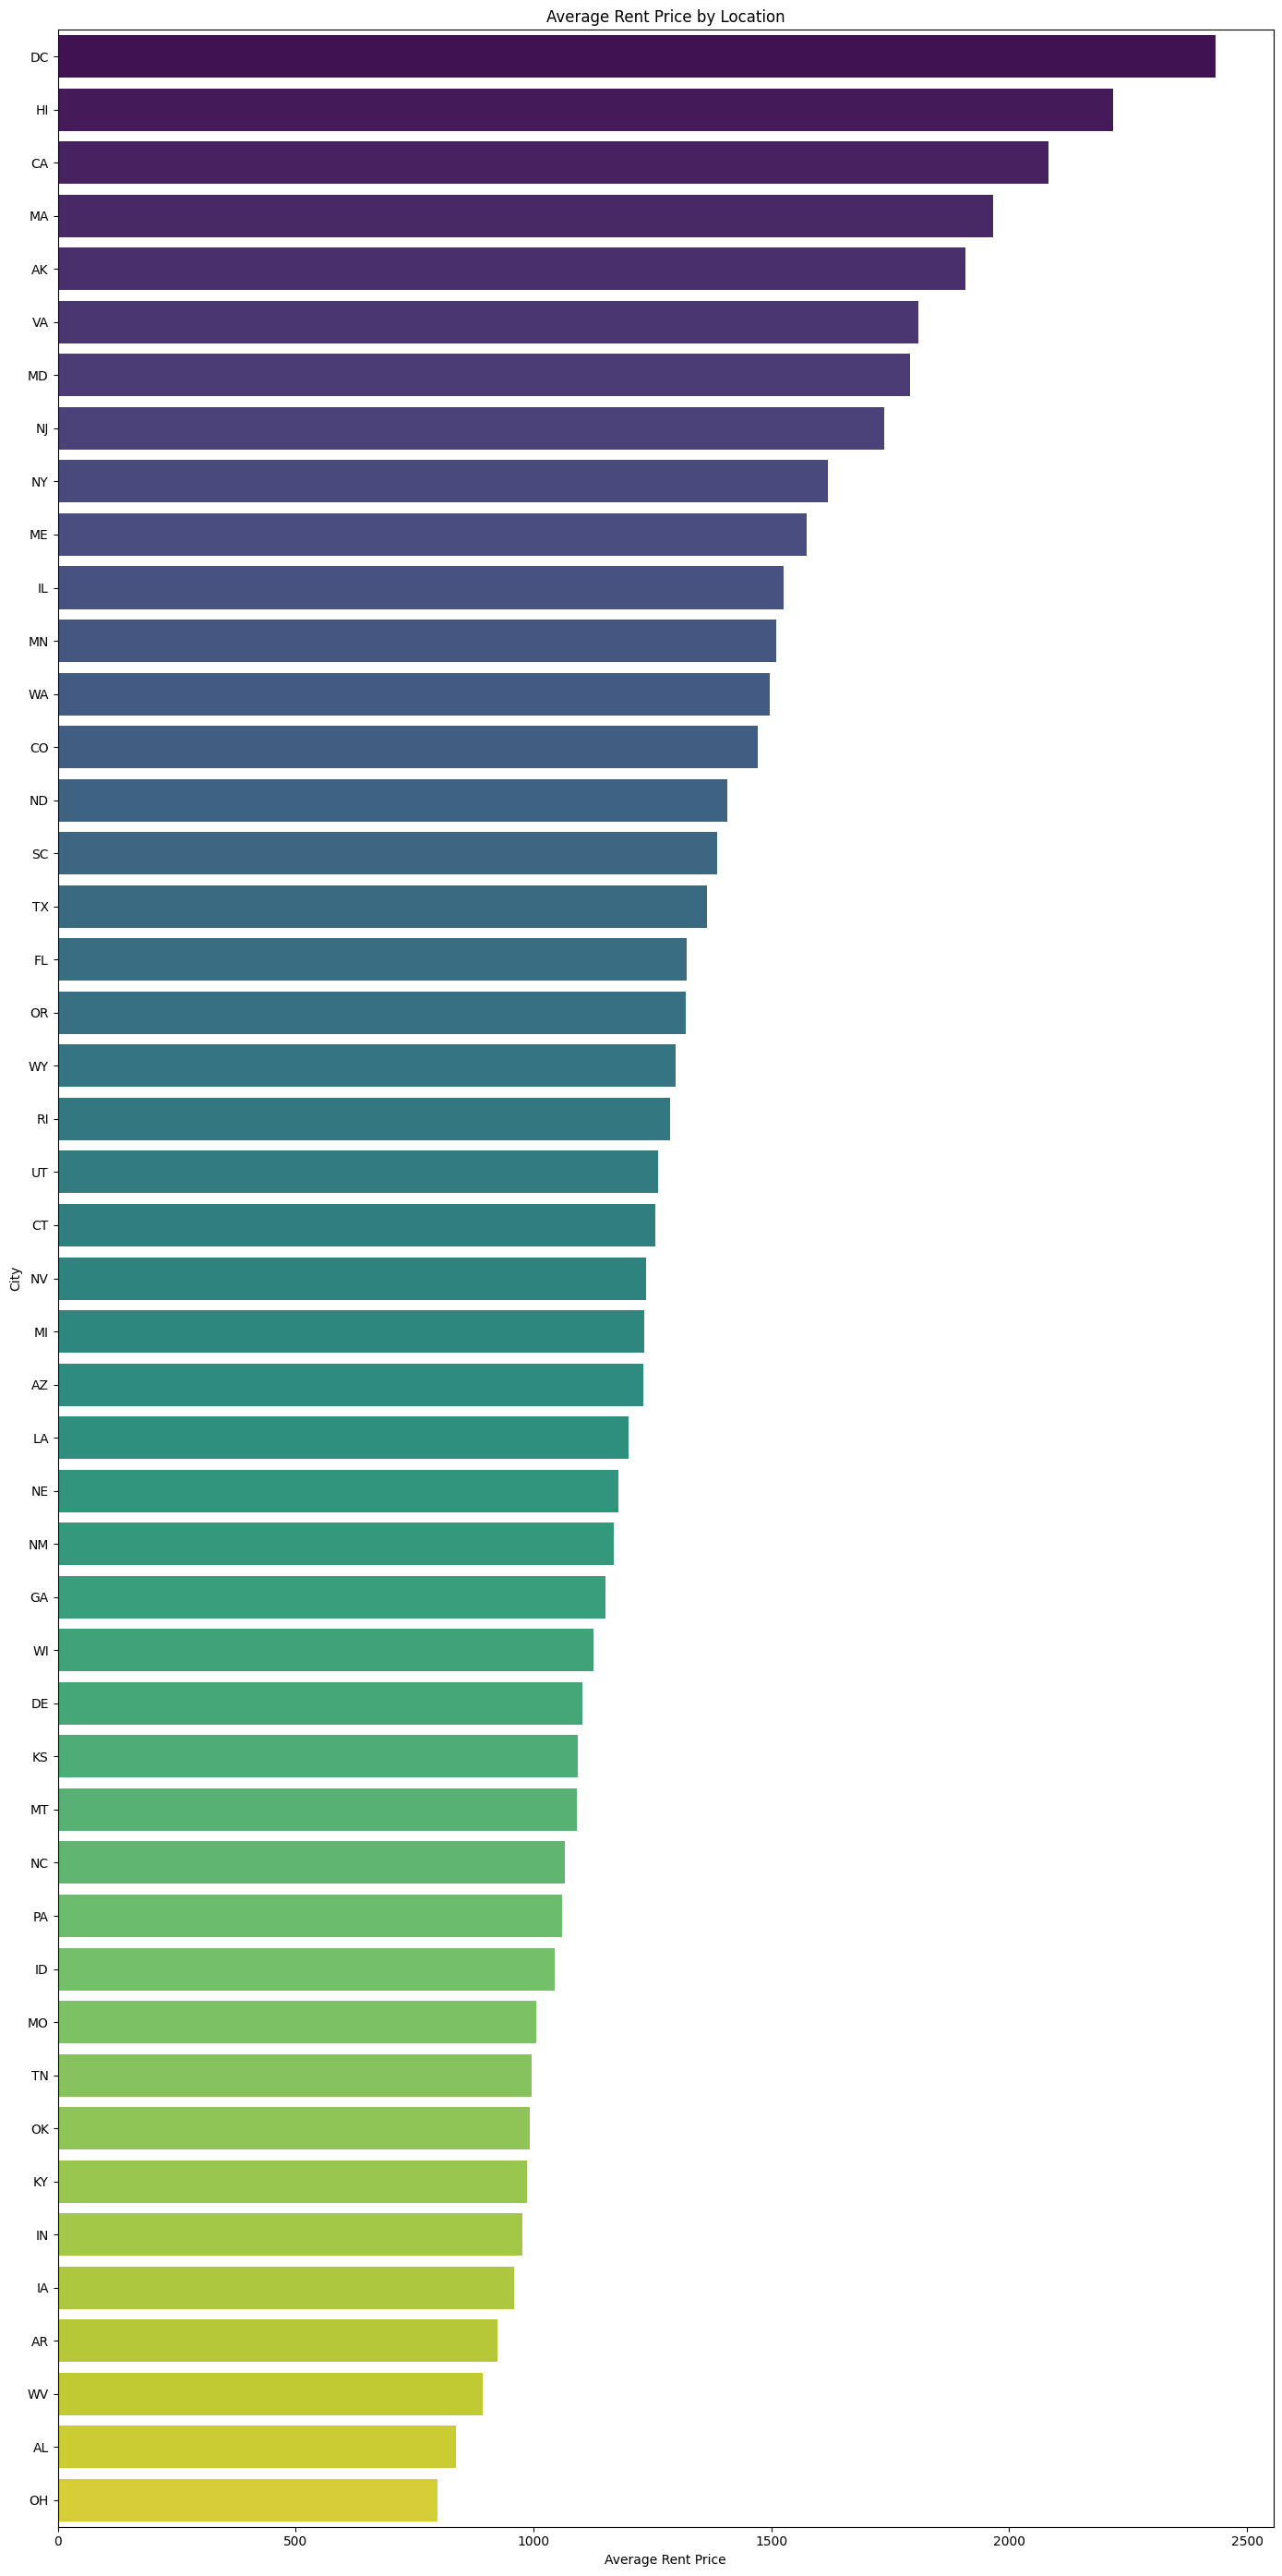

In [100]:
# Calculate average rent price for each location
avg_rent_by_location = data.groupby('State')['Rent Price'].mean().reset_index()

# Sort locations by average rent price
avg_rent_by_location = avg_rent_by_location.sort_values(by='Rent Price', ascending=False)

# Plotting
plt.figure(figsize=(14, 28))  # Increase the figure size for better readability
sns.barplot(data=avg_rent_by_location, x='Rent Price', y='State', palette='viridis', linewidth=2)  # Adjust linewidth for gaps
plt.title('Average Rent Price by Location')
plt.xlabel('Average Rent Price')
plt.ylabel('City')
plt.tight_layout()
plt.show()

This plot shows that the more densily populated cities have a higher average rent price than the other more rural locations which supports the null hypothesis. This also does show some wealthy communities are rpesent which aren't exactly highly populated, but just a very high end area such as Palo Alto which is not as densily populated as San Francisco but has a higher rent.

Visualizing the data helped us understand why the rent price has changed over time, and what factors play into causing rent prices to differ from one another. This data can be further explored by building a model which brings us to our next step.

## Building a Model

Next we will build a model of our data that can predict the rent price based on the state, city, metro, county, pop rank, date, and sqare footage. The other columns won't be included either because they are what we are trying to find (Rent Price) or irrelevant.

Now we are going to create the features and labels matricies for the model (X and y respectively).

the features matrix is a matrix with each observation as a row and each category in which we want to use in training our model as columns.

We also need to change the string values in our data to some sort of float values. which is what you see happening in the for loop.

In [101]:
X = data.copy()
y = data['Rent Price']
X.drop(['Rent Price', 'Price Per Sq. Ft.', 'City Code', 'Average Income'], axis=1, inplace=True)
X['Year'] = data['Date'].dt.year
X['Month'] = data['Date'].dt.month
for col in X.columns:
    scaler = MinMaxScaler(feature_range=(-10,10))
    enc = LabelEncoder().fit_transform(X[col])
    enc = pd.DataFrame(enc)
    X[col] = scaler.fit_transform(enc)
X

,City,Metro,County,State,Population Rank,Date,Square Footage,Year,Month
1,-0.827068,-0.289855,0.109890,-8.260870,-9.927007,-10.0,-2.622162,-10.0,-10.0
2,-6.917293,-6.666667,-6.263736,-3.913043,-9.854015,-10.0,-6.300323,-10.0,-10.0
3,-3.233083,-2.753623,-2.417582,7.391304,-9.781022,-10.0,2.887152,-10.0,-10.0
4,3.082707,2.898551,3.186813,5.652174,-9.708029,-10.0,-5.093143,-10.0,-10.0
5,3.157895,3.043478,0.659341,-8.695652,-9.635036,-10.0,-2.119359,-10.0,-10.0
...,...,...,...,...,...,...,...,...,...
19939,-5.563910,1.159420,-5.824176,0.000000,9.708029,10.0,-8.761112,10.0,10.0
19940,-6.090226,-5.652174,8.791209,-6.086957,9.781022,10.0,-4.908556,10.0,10.0
19941,3.233083,-0.289855,0.109890,-8.260870,9.854015,10.0,-6.017213,10.0,10.0
19942,4.135338,3.913043,4.725275,9.130435,9.927007,10.0,-8.526697,10.0,10.0


The above print out shows the new data matrix in where we encoded the strings with numerical values between -10 and 10

Below, we are going to split the data into train and test sets (20% train 80% test). Then we will train the model and get the weights. these weights are what we pass into the predict function to get a set of guesses. We then compare them to the expected values using the mean Absolute error.

In [102]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)

mse = mean_absolute_error(y_test, y_test_pred_rf)
print('MAE: ', mse)
print(y_test_pred_rf)
print(y_test)

MAE:  8.56851265014056
[1809.79 1508.61 1198.89 ... 1344.42  842.17 1233.37]
17854    1823.0
9733     1509.0
4435     1199.0
6139     2165.0
6748     1099.0
          ...  
11447    1986.0
15786    2064.0
15299    1348.0
2855      842.0
17531    1225.0
Name: Rent Price, Length: 3913, dtype: float64


We can see above that the average difference in our predicted values and the actual values is only 8. which in terms of our units is 8$ which is not that bad. This small difference represents that the model is highly accurate and could be used to approximate rent values in the future. This is a highly useful model and the effectiveness of this model helps support the findings below. This model was created using a RandomForrests approach which is a highly accurate model, which is less prone to overfitting, which made it a perfect fit for the data. Our approach of removing the actual values of the data for missing values was perfectly handled by random forrests as it has a feature to fill in missing values appropriately. The RandomForrests approach also has many advantages over linear regression due to how it can handle non-linear data, and how it doesn't make assumptions about the distribution of data. All these reasons lead us to using a RandomForrests approach.

## Interpretation

The relationship between rent prices, income levels, and average salaries is crucial for understanding housing affordability and economic trends over time. Being able to break down the trends and the relationship is important. 

Rent prices tend to fluctuate based on various factors such as demand, supply, inflation, and local economic conditions. In urban areas or regions experiencing rapid population growth, rent prices often rise due to increased demand for housing. Conversely, in areas with economic downturns or oversupply of rental properties, rent prices may stagnate or even decrease.

Income levels generally reflect the earning capacity of individuals within a specific economy or demographic group. Over time, income levels may rise due to factors such as economic growth, productivity gains, changes in labor market dynamics, and government policies (such as minimum wage increases or tax reforms). However, income growth is not uniform across all sectors or geographic regions, leading to disparities in purchasing power and affordability.

During periods of economic expansion, both rent prices and income levels tend to rise, albeit at different rates. However, in times of economic recession or stagnation, income growth may stagnate or decline while rent prices remain relatively stable or experience slower growth.

In summary, the relationship between rent prices, income levels, and average salaries is complex and multifaceted, influenced by a combination of economic, social, and policy factors. Understanding these dynamics is essential for addressing housing affordability challenges and promoting inclusive economic development. It has also seen many urban places adn differnt cities in certain reginodn of the United States with much higher rent prices, such as DC, New York compared to more less populated regions such as Ohio and Iowa. 

Typically, a higher price per square foot is associated with a higher total rent price. This suggests that more expensive areas per unit area (square foot) also tend to have higher overall rent costs.

Different regions may show varying levels of correlation. For instance, in high-demand urban areas, the price per square foot might significantly drive total rent prices, while in suburban or rural areas, this correlation might be weaker, this also ties into the aspext of hwo certain places wages are mich highjer and that becomes relative to rent prices, the higher the avergae income and wages are the higher rent is.

Urban areas often have higher prices per square foot compared to rural areas due to higher demand, limited space, and better amenities. This also translates to higher total rent prices in cities. States with booming economies or high population densities (e.g., California, New York) usually have higher price per square foot and total rent prices compared to less populated states. 

   City Code          City         Metro        County State  Population Rank  \
0       6181      New York      New York        Queens    NY                1   
1      12447   Los Angeles   Los Angeles   Los Angeles    CA                2   
2      17426       Chicago       Chicago          Cook    IL                3   
3      39051       Houston       Houston        Harris    TX                4   
4      13271  Philadelphia  Philadelphia  Philadelphia    PA                5   

   November 2010  December 2010  January 2011  February 2011  ...  April 2016  \
0            NaN            NaN           NaN            NaN  ...       1.806   
1          1.578          1.578         1.580          1.582  ...       1.990   
2          1.244          1.248         1.254          1.254  ...       1.354   
3          0.788          0.784         0.784          0.786  ...       0.984   
4          0.854          0.858         0.858          0.858  ...       0.948   

   May 2016  June 2016  Ju

/tmp/ipykernel_30987/3990001936.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Price per sq in', y='City', palette='viridis', linewidth=1)


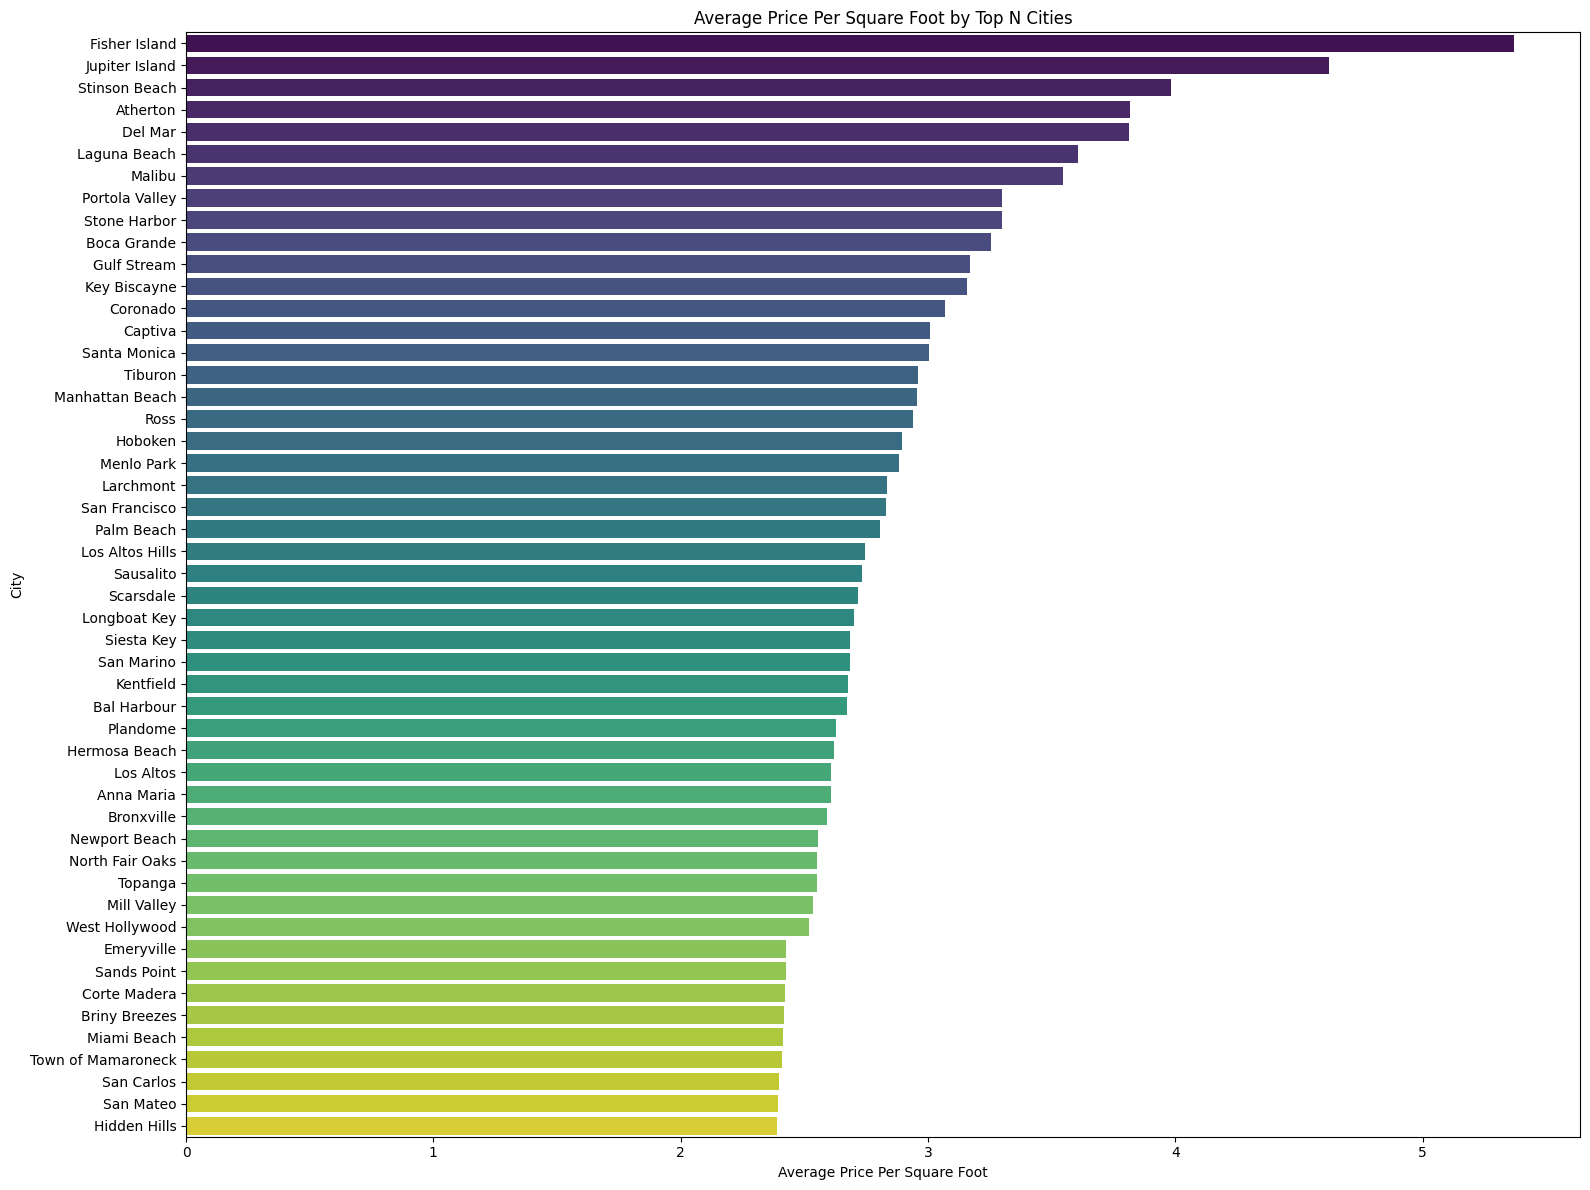

In [103]:
data = pd.read_csv('pricepersqft.csv')

# Display the first few rows to understand the structure of the data
print(data.head())

# Reshape the data
date_columns = data.columns[6:]

melted_data = pd.melt(data, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'], 
                      value_vars=date_columns, 
                      var_name='Date', 
                      value_name='Price per sq in')

melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%B %Y', errors='coerce')
melted_data = melted_data.dropna(subset=['Price per sq in'])
print(melted_data.head())

# Calculate the average price per square foot for each city
avg_price_per_sqft = melted_data.groupby('City')['Price per sq in'].mean().reset_index()

# Sort by average price per square foot in descending order
avg_price_per_sqft = avg_price_per_sqft.sort_values(by='Price per sq in', ascending=False)
print(avg_price_per_sqft)
top_cities = avg_price_per_sqft.head(50)
plt.figure(figsize=(16, 12))
sns.barplot(data=top_cities, x='Price per sq in', y='City', palette='viridis', linewidth=1)
plt.title('Average Price Per Square Foot by Top N Cities')
plt.xlabel('Average Price Per Square Foot')
plt.ylabel('City')
plt.tight_layout()
plt.show()

if 'Region' in melted_data.columns:
    melted_data['Region'] = melted_data['City'] + ", " + melted_data['State'] 
    avg_price_per_sqft_region = melted_data.groupby('Region')['Price per sq in'].mean().reset_index()
    avg_price_per_sqft_region = avg_price_per_sqft_region.sort_values(by='Price per sq in', ascending=False)
    top_regions = avg_price_per_sqft_region.head(10)
    g = sns.FacetGrid(top_regions, col='Region', col_wrap=4, height=4, aspect=1.5)
    g.map_dataframe(sns.barplot, x='Price per sq in', y='Region', palette='viridis', ci=None)
    g.add_legend()
    g.set_axis_labels('Average Price Per Square Foot', 'Region')
    g.set_titles(col_template='{col_name}')
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Average Price Per Square Foot by Top N Regions')
    plt.show()

Here we show how rent prices have fluctuated and have gone through the same trajectory of inflation, here the information gathered visualizes how beside price per square foot in different regions, city and state. This shows how property is more "valuable" in 
different parts of the country and it all depends on economics and population which ties into scarcity and demand.